In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
#from qgrid import show_grid
from funpymodeling.exploratory import freq_tbl,status,profiling_num,cat_vars,num_vars
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
# URL de la página de búsqueda de celulares en Mercado Libre
url = 'https://listado.mercadolibre.com.pe/celulares-telefonos/celulares-smartphones/samsung/nuevo/#deal_print_id=c68838e0-0f84-11ee-980e-4b0ec61ddcec&c_id=card-primary-withoutdiscount&c_element_order=1&c_campaign=SAMSUNG&c_uid=c68838e0-0f84-11ee-980e-4b0ec61ddcec'


In [3]:
response = requests.get(url)

In [4]:
# Crear el objeto BeautifulSoup para analizar el contenido HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [5]:
# Encontrar todos los elementos de la lista de productos
productos = soup.find_all('li', class_='ui-search-layout__item')


In [6]:
data=[ ]

In [14]:
# Iterar sobre los productos y extraer la información deseada
for producto in productos:
    # Extraer el título del producto
    titulo = producto.find('h2', class_='ui-search-item__title').text
    
    # Extraer el precio del producto
    precio = producto.find('span', class_='price-tag-fraction').text
    Precio=float(precio.replace(',','').replace(',','.'))
    data.append({'Equipo':titulo,'Precio':precio})
df=pd.DataFrame(data)
# Imprimir la información del producto
print(df)

                                               Equipo Precio
0            Samsung Galaxy A04e 64 GB negro 3 GB RAM    499
1            Samsung Galaxy A23 128 GB black 4 GB RAM    866
2   Samsung Galaxy Note20 Ultra 5G 128 GB negro mí...  3.499
3    Samsung Galaxy S10+ 128 GB negro prisma 8 GB RAM  1.460
4   Samsung Galaxy S22 Ultra (Snapdragon) 5G Dual ...  6.499
..                                                ...    ...
95  Samsung Galaxy S20 FE 5G 5G 128 GB cloud mint ...  1.695
96   Samsung Galaxy A13 Dual SIM 64 GB black 4 GB RAM    729
97  Samsung Galaxy A03 Dual SIM 128 GB negro 4 GB RAM    599
98           Samsung Galaxy A04 128 GB verde 4 GB RAM    559
99    Samsung Galaxy S20 FE 128 GB cloud red 6 GB RAM  1.821

[100 rows x 2 columns]


In [15]:
print(df.dtypes)

Equipo    object
Precio    object
dtype: object


In [16]:
df

,Equipo,Precio
0,Samsung Galaxy A04e 64 GB negro 3 GB RAM,499
1,Samsung Galaxy A23 128 GB black 4 GB RAM,866
2,Samsung Galaxy Note20 Ultra 5G 128 GB negro mí...,3.499
3,Samsung Galaxy S10+ 128 GB negro prisma 8 GB RAM,1.460
4,Samsung Galaxy S22 Ultra (Snapdragon) 5G Dual ...,6.499
...,...,...
95,Samsung Galaxy S20 FE 5G 5G 128 GB cloud mint ...,1.695
96,Samsung Galaxy A13 Dual SIM 64 GB black 4 GB RAM,729
97,Samsung Galaxy A03 Dual SIM 128 GB negro 4 GB RAM,599
98,Samsung Galaxy A04 128 GB verde 4 GB RAM,559


In [17]:
df.to_excel('celulares.xlsx')

In [18]:
data=pd.read_excel('celulares.xlsx')

In [19]:
from pandas.core.arrays.string_ import StringDtype

In [32]:
data['Precio'] = data['Precio'].astype(str)

# Remove the decimal point from the `Precio` column
data['Precio'] = data['Precio'].str.replace('.', '')

print(data)

                                               Equipo Precio
0            Samsung Galaxy A04e 64 GB negro 3 GB RAM   4990
1            Samsung Galaxy A23 128 GB black 4 GB RAM   8660
2   Samsung Galaxy Note20 Ultra 5G 128 GB negro mí...   3499
3    Samsung Galaxy S10+ 128 GB negro prisma 8 GB RAM    146
4   Samsung Galaxy S22 Ultra (Snapdragon) 5G Dual ...   6499
..                                                ...    ...
95  Samsung Galaxy S20 FE 5G 5G 128 GB cloud mint ...   1695
96   Samsung Galaxy A13 Dual SIM 64 GB black 4 GB RAM   7290
97  Samsung Galaxy A03 Dual SIM 128 GB negro 4 GB RAM   5990
98           Samsung Galaxy A04 128 GB verde 4 GB RAM   5590
99    Samsung Galaxy S20 FE 128 GB cloud red 6 GB RAM   1821

[100 rows x 2 columns]


/tmp/ipykernel_7376/1051262791.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Precio'] = data['Precio'].str.replace('.', '')


In [34]:
data.shape

(100, 1)

In [ ]:
show_grid(data)

In [35]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Precio,0,0.0,0,0.0,38,object


SUGERENCIAS SEGUN SU NECESIDAD

In [42]:
Dinero_disponible=(input('Ingrese:'))
productos=data[data['Precio']<=Dinero_disponible]
print(productos)

Ingrese:3000
   Precio
3     146
5    1649
6    2122
10     15
13   1269
14   1299
16   2999
17    147
18   2699
20   2699
22   2899
23   2299
28   2047
29   1299
30   1299
32   1299
33   1464
34   2099
37   1299
38   2199
39   2099
44   2199
45   1695
49   1821
53    146
55   1649
56   2122
60     15
63   1269
64   1299
66   2999
67    147
68   2699
70   2699
72   2899
73   2299
78   2047
79   1299
80   1299
82   1299
83   1464
84   2099
87   1299
88   2199
89   2099
94   2199
95   1695
99   1821


<Axes: xlabel='count', ylabel='Precio'>

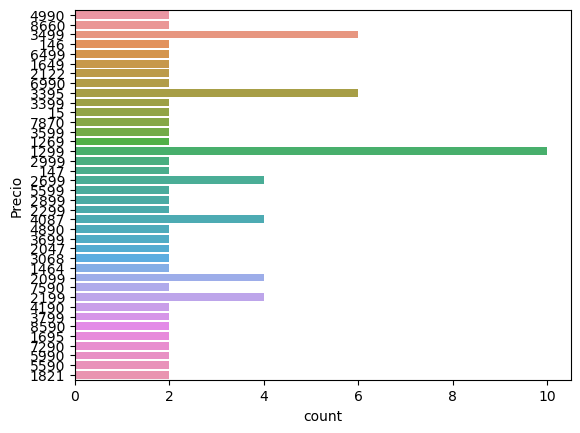

In [46]:
import seaborn as sns
sns.countplot(y='Precio',data=data)

In [47]:
data['Precio'].value_counts().index

Index(['1299', '3499', '3395', '2099', '2699', '4087', '2199', '4990', '3699',
       '2047', '3068', '1464', '4190', '7590', '3799', '8590', '1695', '7290',
       '5990', '5590', '4890', '2899', '2299', '8660', '5599', '147', '2999',
       '1269', '3599', '7870', '15', '3399', '6990', '2122', '1649', '6499',
       '146', '1821'],
      dtype='object')

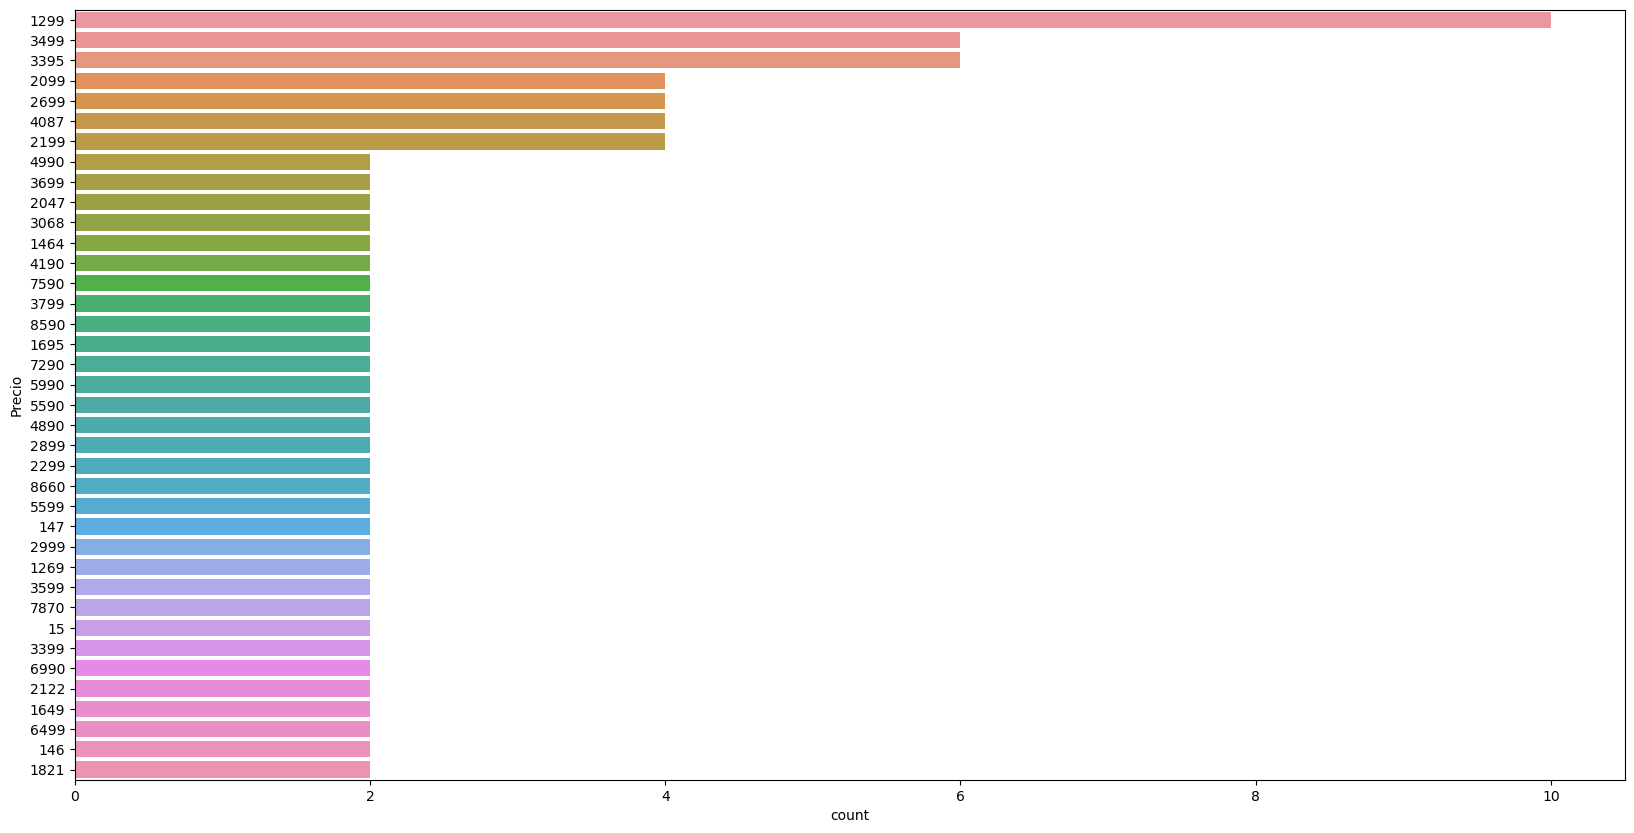

In [51]:
plt.figure(figsize=(20,10))
sns.countplot(y=data['Precio'],order=data['Precio'].value_counts().index)
plt.show()

In [58]:
from dash import dash, dcc, html

In [59]:
app=dash.Dash(__name__)

In [65]:
app.layout=html.Div([
    dcc.Graph (id='cheetah_bar_chart',figure=data)
])

In [66]:
if __name__ =='__main__':
    app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: on


Address already in use
Port 8050 is in use by another program. Either identify and stop that program, or start the server with a different port.


AttributeError: 'tuple' object has no attribute 'tb_frame'